In [1]:
import pandas as pd
import numpy as np

# Loading the Data

In [2]:
df = pd.read_csv("spam.csv", encoding = ('ISO 8859-1'))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3140,ham,Customer place i will call you,NaN,NaN,NaN
495,ham,Got meh... When?,NaN,NaN,NaN
3922,ham,Okay lor... Will they still let us go a not ah...,NaN,NaN,NaN
5366,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...,NaN,NaN,NaN
1102,ham,Black shirt n blue jeans... I thk i c Ì_...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA(Exploratry Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement


## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Dropping the columns which has very less non-null values

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
664,ham,Yes baby! We can study all the positions of th...
3173,ham,It vl bcum more difficult..
5055,ham,Goodnight da thangam I really miss u dear.
4426,ham,So what did the bank say about the money?
543,ham,4 oclock at mine. Just to bash out a flat plan.


#### Renaming the columns

In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
625,ham,"Haha good to hear, I'm officially paid and on ..."
1781,ham,";-( oh well, c u later"
143,ham,I know you are. Can you pls open the back?
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...
3704,ham,Ok. Very good. Its all about making that money.


#### target should have numerical values so, i am doing preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Checking for missing values

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

#### Checking for duplicate values

In [14]:
df.duplicated().sum()

403

#### Removing duplicates

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA(Exploratry Data Analysis)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

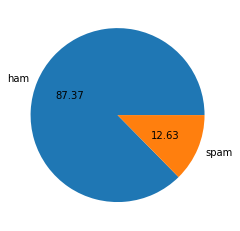

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Number of characters in each line.

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### Number of words in each line

In [26]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### Number of sentences in each line

In [30]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977559,18.453086,1.947185
std,58.236678,13.324996,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


#### ham message

In [35]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.458813,17.120682,1.799601
std,56.358596,13.493932,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


#### spam messages

In [36]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [37]:
import seaborn as sns

### plotting the graph for number of characters in ham and in spam messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

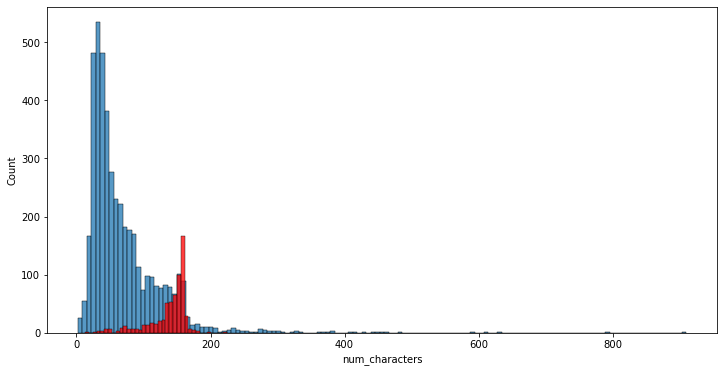

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

### Plotting the graph for number of words in ham and in spam messages

<AxesSubplot:xlabel='num_words', ylabel='Count'>

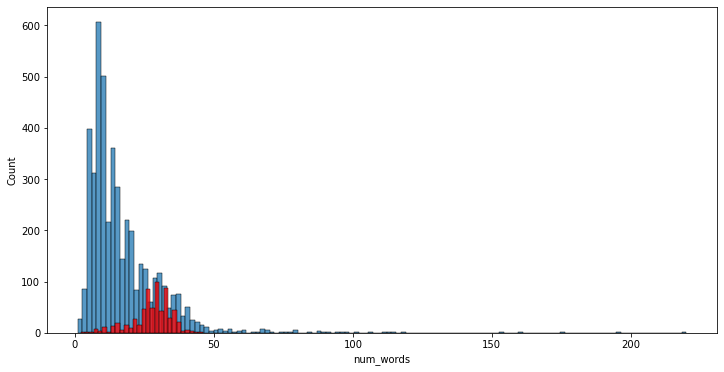

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

### Plotting the graph for number of sentences in ham and in spam messages

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

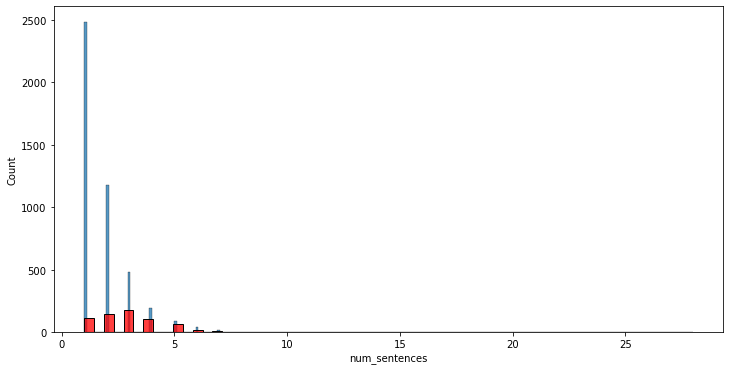

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

### Showing the relation between number of characters, words, sentences in messages

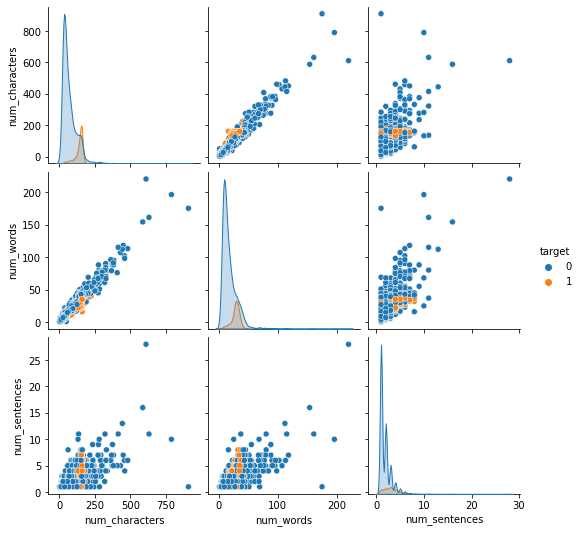

In [41]:
sns.pairplot(df, hue='target')

### Correlation between number of characters, words, sentences in messages

In [42]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262985,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262985,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

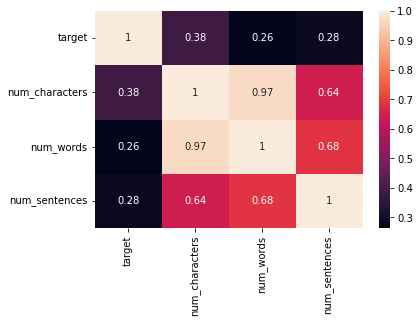

In [43]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
        1. lower case
        2. Tokenization
        3. Removing special characters
        4. Removing stop words and punctuation
        5. Stemming
        

In [44]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()                     # 1. lower case
    text = nltk.word_tokenize(text)         # 2. tokenization
    
    y = []
    for i in text:
        if i.isalnum():                     # 3. Removing special characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                     # 4. Removing stop words and punctuation
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))                 # 5. Stemming
    
    return " ".join(y)

In [45]:
df['text'][10]gon na home soon want talk stuff anymor tonight k cri enough today'

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [47]:
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word cloud for spam

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


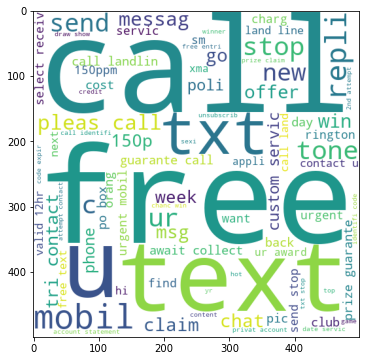

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

### Word cloud for ham

In [52]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

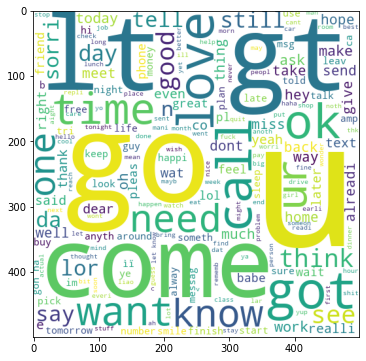

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Top 30 words in spam messages

In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


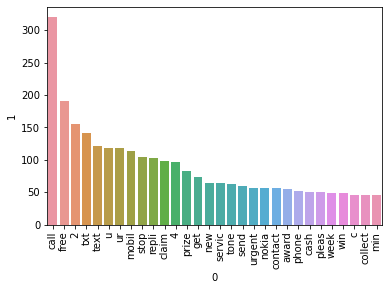

In [58]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Top 30 words of ham messages

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35394

In [61]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


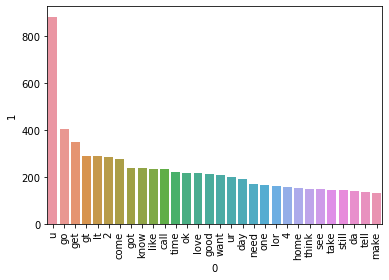

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
import sklearn

In [64]:
print(sklearn.__version__)

1.0.2


In [65]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X.shape

(5169, 3000)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
y.shape

(5169,)

### train_test_split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Training the model with Decision tree classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

In [74]:
clf = DecisionTreeClassifier()

In [75]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9497098646034816
0.8071428571428572


## Training the model with Naive bayes 

In [76]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
0.5068493150684932


In [79]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
1.0


In [80]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
0.991869918699187


In [ ]:
while True:
    print("\n1.To detect the Spam-SMS\n2.Exit")
    try:
        choice = int(input("Enter your choice = "))
    except:
        print("You have entered something wrong!!!")
        break
    if choice == 1:
        input_sms = input("Enter the message\n")
        # 1. preprocess
        transformed_sms = transform_text(input_sms)
        # 2. vectorize
        vector_input = tfidf.transform([transformed_sms])
        # 3. predict
        result = mnb.predict(vector_input)[0]
        # 4. Display
        if result == 1:
            print("Spam")
        else:
            print("Not Spam")
    elif choice == 2:
        break
    else:
        print("You have entered wrong number")


1.To detect the Spam-SMS
2.Exit
Enter your choice = 1
Enter the message
Hello Arun, Can you send me the file,  for which I have told you.
Not Spam

1.To detect the Spam-SMS
2.Exit
Enter your choice = 1
Enter the message
Congratulations ur awarded 500 of CD vouchers  or 125gift guaranteed & Free entry 2 100 wkly  draw txt MUSIC to 87066  TnCs www.Ldew.com1win150ppmx3age16
Spam

1.To detect the Spam-SMS
2.Exit
